#Proses Data Preparation

In [1]:
#1. Install apache spark pada google colab
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.6.tgz
!tar xf spark-2.4.7-bin-hadoop2.6.tgz
!pip install -q findspark

In [2]:
#2. setting environment variable
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.6"

In [3]:
#3. Inisiasi spark pada google colab
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
#4. Upload data Bill Authentication
from google.colab import files
files.upload()

Saving bill_authentication.csv to bill_authentication.csv


{'bill_authentication.csv': b'Variance,Skewness,Curtosis,Entropy,Class\r\n3.6216,8.6661,-2.8073,-0.44699,0\r\n4.5459,8.1674,-2.4586,-1.4621,0\r\n3.866,-2.6383,1.9242,0.10645,0\r\n3.4566,9.5228,-4.0112,-3.5944,0\r\n0.32924,-4.4552,4.5718,-0.9888,0\r\n4.3684,9.6718,-3.9606,-3.1625,0\r\n3.5912,3.0129,0.72888,0.56421,0\r\n2.0922,-6.81,8.4636,-0.60216,0\r\n3.2032,5.7588,-0.75345,-0.61251,0\r\n1.5356,9.1772,-2.2718,-0.73535,0\r\n1.2247,8.7779,-2.2135,-0.80647,0\r\n3.9899,-2.7066,2.3946,0.86291,0\r\n1.8993,7.6625,0.15394,-3.1108,0\r\n-1.5768,10.843,2.5462,-2.9362,0\r\n3.404,8.7261,-2.9915,-0.57242,0\r\n4.6765,-3.3895,3.4896,1.4771,0\r\n2.6719,3.0646,0.37158,0.58619,0\r\n0.80355,2.8473,4.3439,0.6017,0\r\n1.4479,-4.8794,8.3428,-2.1086,0\r\n5.2423,11.0272,-4.353,-4.1013,0\r\n5.7867,7.8902,-2.6196,-0.48708,0\r\n0.3292,-4.4552,4.5718,-0.9888,0\r\n3.9362,10.1622,-3.8235,-4.0172,0\r\n0.93584,8.8855,-1.6831,-1.6599,0\r\n4.4338,9.887,-4.6795,-3.7483,0\r\n0.7057,-5.4981,8.3368,-2.8715,0\r\n1.1432,-3.74

In [5]:
#5. Load data bill_authentification.csv
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
dataset = spark.read.csv('bill_authentication.csv',inferSchema=True, header =True)
dataset.printSchema()


root
 |-- Variance: double (nullable = true)
 |-- Skewness: double (nullable = true)
 |-- Curtosis: double (nullable = true)
 |-- Entropy: double (nullable = true)
 |-- Class: integer (nullable = true)



In [6]:
#6. Menampilkan data bill_authentification.csv
dataset.show() #20 data pertama

+--------+--------+--------+--------+-----+
|Variance|Skewness|Curtosis| Entropy|Class|
+--------+--------+--------+--------+-----+
|  3.6216|  8.6661| -2.8073|-0.44699|    0|
|  4.5459|  8.1674| -2.4586| -1.4621|    0|
|   3.866| -2.6383|  1.9242| 0.10645|    0|
|  3.4566|  9.5228| -4.0112| -3.5944|    0|
| 0.32924| -4.4552|  4.5718| -0.9888|    0|
|  4.3684|  9.6718| -3.9606| -3.1625|    0|
|  3.5912|  3.0129| 0.72888| 0.56421|    0|
|  2.0922|   -6.81|  8.4636|-0.60216|    0|
|  3.2032|  5.7588|-0.75345|-0.61251|    0|
|  1.5356|  9.1772| -2.2718|-0.73535|    0|
|  1.2247|  8.7779| -2.2135|-0.80647|    0|
|  3.9899| -2.7066|  2.3946| 0.86291|    0|
|  1.8993|  7.6625| 0.15394| -3.1108|    0|
| -1.5768|  10.843|  2.5462| -2.9362|    0|
|   3.404|  8.7261| -2.9915|-0.57242|    0|
|  4.6765| -3.3895|  3.4896|  1.4771|    0|
|  2.6719|  3.0646| 0.37158| 0.58619|    0|
| 0.80355|  2.8473|  4.3439|  0.6017|    0|
|  1.4479| -4.8794|  8.3428| -2.1086|    0|
|  5.2423| 11.0272|  -4.353| -4.

In [7]:
#7. Cek tipe data bill_authentification.csv
type(dataset)

pyspark.sql.dataframe.DataFrame

In [8]:
#8. Menampilkan daftar kolom bill_authentification.csv
dataset.columns

['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

In [9]:
#9. Menampilkan data bill_authentification.csv 
dataset.select(dataset.columns[0:3]).show()

+--------+--------+--------+
|Variance|Skewness|Curtosis|
+--------+--------+--------+
|  3.6216|  8.6661| -2.8073|
|  4.5459|  8.1674| -2.4586|
|   3.866| -2.6383|  1.9242|
|  3.4566|  9.5228| -4.0112|
| 0.32924| -4.4552|  4.5718|
|  4.3684|  9.6718| -3.9606|
|  3.5912|  3.0129| 0.72888|
|  2.0922|   -6.81|  8.4636|
|  3.2032|  5.7588|-0.75345|
|  1.5356|  9.1772| -2.2718|
|  1.2247|  8.7779| -2.2135|
|  3.9899| -2.7066|  2.3946|
|  1.8993|  7.6625| 0.15394|
| -1.5768|  10.843|  2.5462|
|   3.404|  8.7261| -2.9915|
|  4.6765| -3.3895|  3.4896|
|  2.6719|  3.0646| 0.37158|
| 0.80355|  2.8473|  4.3439|
|  1.4479| -4.8794|  8.3428|
|  5.2423| 11.0272|  -4.353|
+--------+--------+--------+
only showing top 20 rows



In [10]:
#10. Memeriksa data duplikat 
dataset.groupBy('Variance','Skewness','Curtosis').count().filter('count > 1').show()

+--------+--------+--------+-----+
|Variance|Skewness|Curtosis|count|
+--------+--------+--------+-----+
|  0.5706| -0.0248|  1.2421|    4|
| -0.2062|  9.2207| -3.7044|    3|
| -1.8584|   7.886| -1.6643|    3|
| -2.6479| 10.1374|  -1.331|    3|
|  0.3292| -4.4552|  4.5718|    4|
|  0.9297| -3.7971|  4.6429|    3|
|    -1.3| 10.2678|  -2.953|    3|
| -0.7869|  9.5663| -3.7867|    2|
|  -0.278|  8.1881| -3.1338|    2|
|  0.3798|  0.7098|  0.7572|    4|
|  0.5195| -3.2633|  3.0895|    4|
+--------+--------+--------+-----+



In [14]:
#11. menghapus data duplikat
dsnodup = dataset.dropDuplicates(['Variance','Skewness','Curtosis'])

In [15]:
#12. cek data duplikat yang telah dihapus
dsnodup.groupBy('Variance','Skewness','Curtosis').count().filter('count > 1').show()

+--------+--------+--------+-----+
|Variance|Skewness|Curtosis|count|
+--------+--------+--------+-----+
+--------+--------+--------+-----+



In [13]:
#13. cek data null pada bill_authentification.csv
dsnodup.where('Variance is null').show()

+--------+--------+--------+-------+-----+
|Variance|Skewness|Curtosis|Entropy|Class|
+--------+--------+--------+-------+-----+
+--------+--------+--------+-------+-----+



In [16]:
#14. Menampilkan rangkuman data dataset.describe().show()
dataset.describe("Variance").show()
dataset.describe("Skewness").show()

+-------+------------------+
|summary|          Variance|
+-------+------------------+
|  count|              1372|
|   mean|0.4337352570699707|
| stddev|2.8427625862785577|
|    min|           -7.0421|
|    max|            6.8248|
+-------+------------------+

+-------+------------------+
|summary|          Skewness|
+-------+------------------+
|  count|              1372|
|   mean|1.9223531206393603|
| stddev| 5.869046743695513|
|    min|          -13.7731|
|    max|           12.9516|
+-------+------------------+



In [17]:
#15. Menampilkan data pada variance
dataset.show(2,truncate= True) 
X  =  dataset.collect()[0]['Variance'] 
X  =  dataset.collect()[0][3]

+--------+--------+--------+--------+-----+
|Variance|Skewness|Curtosis| Entropy|Class|
+--------+--------+--------+--------+-----+
|  3.6216|  8.6661| -2.8073|-0.44699|    0|
|  4.5459|  8.1674| -2.4586| -1.4621|    0|
+--------+--------+--------+--------+-----+
only showing top 2 rows



Data diatas sudah bersih saat melakukan data preparation atau data preprocessing, yang bisa kita lihat sudah dihapusnya data yang duplikat dan tidak ada data yang null pada data bill_authentification.csv selanjutnya melakukan tahap data exploration dan statiscial thinking

#Data Exploration dan Statiscial Thinking

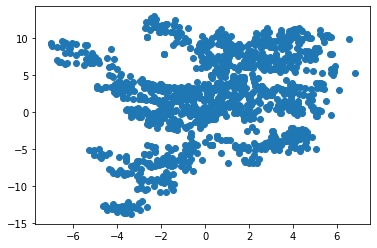

In [19]:
#1.visualisasikan data bill_authentification.csv pada kolom variance dan skewness
import matplotlib.pyplot as plt
x =  dataset.select("Variance").rdd.flatMap(lambda  x:  x).collect() 
y = dataset.select("Skewness").rdd.flatMap(lambda x: x).collect() 
plt.scatter(x, y);

In [21]:
#2. Menginisialisasi data pada variabel df_spark dan melihat type data
df_spark = spark.read.csv('bill_authentication.csv', inferSchema=True, header=True)
print(type(df_spark))

<class 'pyspark.sql.dataframe.DataFrame'>


In [22]:
#3. print baris dan kolom pada spark dalam bentuk pandas 
print((df_spark.count(), len(df_spark.columns)))

(1372, 5)


In [23]:
#4. Menghitung Variabel statistik untuk kolom
df_spark.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Variance,1372,0.4337352570699707,2.8427625862785577,-7.0421,6.8248
Skewness,1372,1.9223531206393603,5.869046743695513,-13.7731,12.9516
Curtosis,1372,1.3976271172667651,4.310030090106595,-5.2861,17.9274
Entropy,1372,-1.191656520043731,2.101013137359609,-8.5482,2.4495
Class,1372,0.4446064139941691,0.4971032701256608,0,1


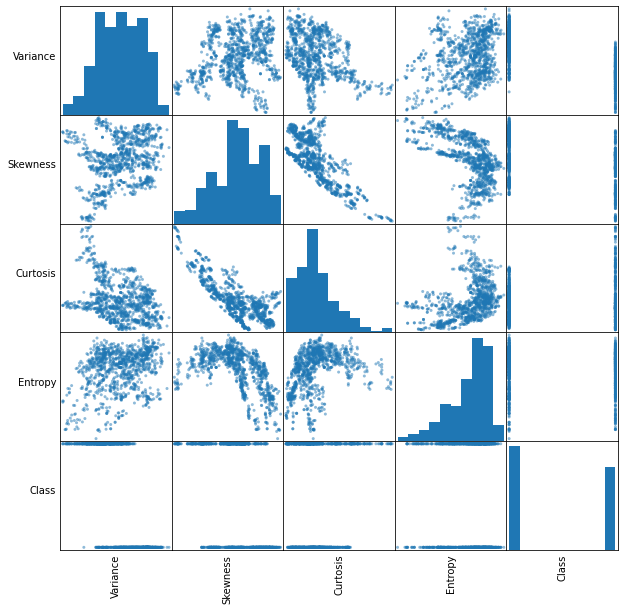

In [24]:
#5. Plot scatter matrix dengan menggunakan columns 
import pandas as pd
from pandas.plotting import scatter_matrix
numeric_features = [t[0] for t in df_spark.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = df_spark.select(numeric_features).sample(False, 0.8).toPandas()
axs = scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [25]:
#6. Membuat Matrix Korelasi dengan menggunakan features dan class
import six
for i in df_spark.columns:
    if not( isinstance(df_spark.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Class for ", i, df_spark.stat.corr('Class',i))

Correlation to Class for  Variance -0.7248431424446066
Correlation to Class for  Skewness -0.4446877575965928
Correlation to Class for  Curtosis 0.15588323600923024
Correlation to Class for  Entropy -0.023423678954851625
Correlation to Class for  Class 1.0


#Menyiapkan Data untuk menggunakan algoritma Machine Learning. Membagi data menjadi 2 kolom karna spark hanya mendukung 2 kolom,disini kami menggunakan kolom 1 untuk features dan yang kedua adalah label [Class]

In [26]:
#7. Spark hanya mendukung dua kolom pada data latih, satu untuk features dan yang kedua adalah label
# Vector Assembler digunakan untuk mengumpulkan semua features yang digunakan untuk pelatihan
# Masukkan label tempat melatih model Klasifikasi untuk memperkirakan
# Melihat tagihan palsu/tidak
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['Variance', 'Skewness', 'Curtosis', 'Entropy'], outputCol = 'features')
Counterfeit_df = vectorAssembler.transform(df_spark)
Counterfeit_df= Counterfeit_df.select(['features', 'Class'])
Counterfeit_df.show(3)

+--------------------+-----+
|            features|Class|
+--------------------+-----+
|[3.6216,8.6661,-2...|    0|
|[4.5459,8.1674,-2...|    0|
|[3.866,-2.6383,1....|    0|
+--------------------+-----+
only showing top 3 rows



In [27]:
#8. Membagi data menjadi pelatihan dan pengujian, 80% pelatihan dan 20% pengujian
weights = [.8, .2]
#seed = 42 # seed=0L
rawTrainData, rawValidationData = Counterfeit_df.randomSplit(weights)

In [28]:
#9. Melihat data raw validation
rawValidationData .show(100)

+--------------------+-----+
|            features|Class|
+--------------------+-----+
|[-6.5084,8.7696,0...|    1|
|[-6.3979,6.4479,1...|    1|
|[-6.2003,8.6806,0...|    1|
|[-5.873,9.1752,-0...|    1|
|[-5.2049,7.259,0....|    1|
|[-4.9462,3.5716,0...|    1|
|[-4.8392,6.6755,-...|    1|
|[-4.5046,-5.8126,...|    1|
|[-4.4775,-13.0303...|    1|
|[-4.3967,4.9601,-...|    1|
|[-4.2932,3.3419,0...|    1|
|[-4.2859,8.5234,3...|    0|
|[-4.244,-13.0634,...|    1|
|[-3.9934,5.8333,0...|    1|
|[-3.9594,4.0289,-...|    1|
|[-3.8073,-8.0971,...|    1|
|[-3.6817,3.2239,-...|    1|
|[-3.6085,3.3253,-...|    1|
|[-3.5895,-6.572,1...|    1|
|[-3.5801,-12.9309...|    1|
|[-3.38,-0.7077,2....|    1|
|[-3.2854,4.0372,-...|    1|
|[-3.2778,1.8023,0...|    1|
|[-3.1875,-7.5756,...|    1|
|[-3.0799,0.60836,...|    1|
|[-3.0731,-0.53181...|    1|
|[-3.0,-9.1566,9.5...|    1|
|[-2.9672,-13.2869...|    1|
|[-2.9662,-10.3257...|    1|
|[-2.9098,-10.0712...|    1|
|[-2.8957,-12.0205...|    1|
|[-2.8391,-6.6

#Logistic Regression

In [29]:

#10. Melatih model dengan menggunakan Logistic Regression
from pyspark.ml.classification import LogisticRegression
lr =  LogisticRegression(featuresCol = 'features', labelCol='Class', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(rawTrainData)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.1440668526422092,0.0,0.0,0.0]
Intercept: -0.1490600107179315


In [30]:
#11. Summary data latih
# Ekstrak ringkasan dari instance LogisticRegressionModel yang dikembalikan yang dilatih

trainingSummary = lr_model.summary

# Melakukan iterasi pada objek
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)

objectiveHistory:
0.6878448230618605
0.6806322086643921
0.6627916521342975
0.6625933930219323
0.662586917210369
0.6625864854812957
0.6625864555656025
0.6625864485937567
0.662586447680623
0.6625864475580358
0.6625864475421335
+--------------------+--------------------+
|                 FPR|                 TPR|
+--------------------+--------------------+
|                 0.0|                 0.0|
|                 0.0| 0.02012072434607646|
|                 0.0| 0.04024144869215292|
|                 0.0|0.060362173038229376|
|                 0.0| 0.08048289738430583|
|                 0.0|  0.1006036217303823|
|                 0.0| 0.12072434607645875|
|                 0.0| 0.14084507042253522|
|                 0.0| 0.16096579476861167|
|                 0.0| 0.18108651911468812|
|                 0.0|  0.2012072434607646|
|                 0.0| 0.22132796780684105|
|                 0.0|  0.2414486921529175|
|                 0.0| 0.26156941649899396|
|                 0.0| 0.28

LogisticRegression_3d62ab488f9e

In [31]:
#12. melihat describe pada data latih
rawTrainData.describe().show()

+-------+-------------------+
|summary|              Class|
+-------+-------------------+
|  count|               1108|
|   mean|0.44855595667870035|
| stddev|0.49757105554108866|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



In [32]:
#13. Menguji data latih dengan logistic regression model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
lr_predictions = lr_model.transform(rawValidationData)
lr_predictions.select("prediction","Class","features").show(5)
# Melihat (prediksi,label sebenarnya) and hitung kesalahan pengujian
evaluator = MulticlassClassificationEvaluator(
    labelCol="Class", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(lr_predictions)
print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % ( accuracy))

+----------+-----+--------------------+
|prediction|Class|            features|
+----------+-----+--------------------+
|       1.0|    1|[-6.5084,8.7696,0...|
|       1.0|    1|[-6.3979,6.4479,1...|
|       1.0|    1|[-6.2003,8.6806,0...|
|       1.0|    1|[-5.873,9.1752,-0...|
|       1.0|    1|[-5.2049,7.259,0....|
+----------+-----+--------------------+
only showing top 5 rows

Test Error = 0.193182 
Accuracy = 0.806818 


In [36]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
areaUnderROC_Test = BinaryClassificationEvaluator(metricName = 'areaUnderROC', labelCol="Class")
ART = areaUnderROC_Test.evaluate(lr_predictions)
print("Area Under Curve test",ART)

Area Under Curve test 0.9156068686631893


#Decison tree clasification

In [37]:
#14. Training dan testing dengan menggunakan decision tree model 
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol='Class')
dt_model = dt.fit(rawTrainData)
dt_predictions = dt_model.transform(rawValidationData)
evaluator = MulticlassClassificationEvaluator(
    labelCol="Class", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(dt_predictions)
print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % ( accuracy))

Test Error = 0.0265152 
Accuracy = 0.973485 


In [38]:
areaUnderROC_Test = BinaryClassificationEvaluator(metricName = 'areaUnderROC', labelCol="Class")
ART = areaUnderROC_Test.evaluate(dt_predictions)
print("Area Under Curve test",ART)

Area Under Curve test 0.9829455547090196


#Gradient Boosting tree Classification

In [39]:
#15.Training dan testing dengan menggunakan Gradient Boosting model
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(featuresCol = 'features', labelCol='Class')
gbt_model = gbt.fit(rawTrainData)
gbt_predictions = gbt_model.transform(rawValidationData)
gbt_predictions.select('prediction', 'Class', 'features').show(5)
evaluator = MulticlassClassificationEvaluator(
    labelCol="Class", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(gbt_predictions)
print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % ( accuracy))

+----------+-----+--------------------+
|prediction|Class|            features|
+----------+-----+--------------------+
|       1.0|    1|[-6.5084,8.7696,0...|
|       1.0|    1|[-6.3979,6.4479,1...|
|       1.0|    1|[-6.2003,8.6806,0...|
|       1.0|    1|[-5.873,9.1752,-0...|
|       1.0|    1|[-5.2049,7.259,0....|
+----------+-----+--------------------+
only showing top 5 rows

Test Error = 0.0113636 
Accuracy = 0.988636 


In [40]:
# Area under Curve 
areaUnderROC_Test = BinaryClassificationEvaluator(metricName = 'areaUnderROC', labelCol="Class")
ART = areaUnderROC_Test.evaluate(gbt_predictions)
print("Area Under Curve test",ART)

Area Under Curve test 0.9988278731758776


#Random Forest

In [41]:

#16. Training dan testing dengan menggunakan Random Forest model
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol='Class')
rf_model = rf.fit(rawTrainData)
rf_predictions = rf_model.transform(rawValidationData)
rf_predictions.select('prediction', 'Class', 'features').show(5)
valuator = MulticlassClassificationEvaluator(
    labelCol="Class", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(rf_predictions)
print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % ( accuracy))

+----------+-----+--------------------+
|prediction|Class|            features|
+----------+-----+--------------------+
|       1.0|    1|[-6.5084,8.7696,0...|
|       1.0|    1|[-6.3979,6.4479,1...|
|       1.0|    1|[-6.2003,8.6806,0...|
|       1.0|    1|[-5.873,9.1752,-0...|
|       1.0|    1|[-5.2049,7.259,0....|
+----------+-----+--------------------+
only showing top 5 rows

Test Error = 0.0340909 
Accuracy = 0.965909 


In [42]:
# Area under Curve 
areaUnderROC_Test = BinaryClassificationEvaluator(metricName = 'areaUnderROC', labelCol="Class")
ART = areaUnderROC_Test.evaluate(rf_predictions)
print("Area Under Curve test",ART)

Area Under Curve test 0.9973627146457247


#SVM model for Classification

In [44]:
#17. Training dan testing menggunakan SVM model
from pyspark.ml.classification import  LinearSVC
lsvc = LinearSVC(maxIter=10, regParam=0.1,featuresCol = 'features', labelCol='Class')
lsvc_model = lsvc.fit(rawTrainData)
lsvm_predictions = lsvc_model.transform(rawValidationData)
lsvm_predictions.select('prediction', 'Class', 'features').show(5)
valuator = MulticlassClassificationEvaluator(
    labelCol="Class", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(lsvm_predictions)
print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % ( accuracy))

+----------+-----+--------------------+
|prediction|Class|            features|
+----------+-----+--------------------+
|       1.0|    1|[-6.5084,8.7696,0...|
|       1.0|    1|[-6.3979,6.4479,1...|
|       1.0|    1|[-6.2003,8.6806,0...|
|       1.0|    1|[-5.873,9.1752,-0...|
|       1.0|    1|[-5.2049,7.259,0....|
+----------+-----+--------------------+
only showing top 5 rows

Test Error = 0.0265152 
Accuracy = 0.973485 


In [45]:
# Area under Curve 
areaUnderROC_Test = BinaryClassificationEvaluator(metricName = 'areaUnderROC', labelCol="Class")
ART = areaUnderROC_Test.evaluate(lsvm_predictions)
print("Area Under Curve test",ART)

Area Under Curve test 0.9990622985407022


#MLP Classifier

In [46]:
#18. Menggunakan algoritma MPL Classifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
# input layer dengan size 4 (fitur), dua intermediate dengan size 5 dan 4
# dan output ada 2  (class  = 1 atau 0)
layers = [4, 5, 4, 2]
# Membuat data latih baru dan set parameter data tersebut
trainer = MultilayerPerceptronClassifier(maxIter=100, layers=layers, blockSize=128, seed=1234,featuresCol = 'features', labelCol='Class')
# train the model
model = trainer.fit(rawTrainData)
MLP_predictions = model.transform(rawValidationData)
MLP_predictions.select('prediction', 'Class', 'features').show(5)
valuator = MulticlassClassificationEvaluator(
    labelCol="Class", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(MLP_predictions)
print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % ( accuracy))

+----------+-----+--------------------+
|prediction|Class|            features|
+----------+-----+--------------------+
|       1.0|    1|[-6.5084,8.7696,0...|
|       1.0|    1|[-6.3979,6.4479,1...|
|       1.0|    1|[-6.2003,8.6806,0...|
|       1.0|    1|[-5.873,9.1752,-0...|
|       1.0|    1|[-5.2049,7.259,0....|
+----------+-----+--------------------+
only showing top 5 rows

Test Error = 0 
Accuracy = 1 


In [47]:
# Area under Curve 
areaUnderROC_Test = BinaryClassificationEvaluator(metricName = 'areaUnderROC', labelCol="Class")
ART = areaUnderROC_Test.evaluate(MLP_predictions)
print("Area Under Curve test",ART)

Area Under Curve test 1.0


#Menggunakan algoritma K-MEANS

In [48]:
#19.load library import pyspark
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import * 
from pyspark.sql.types import *
from pyspark.sql.functions import rand, randn 
from pyspark.ml.clustering import KMeans


In [50]:
#20.seleksi untuk kolom
input_cols=['Variance', 'Skewness', 'Curtosis', 'Entropy']

In [51]:
#21. mengubah semua fitur/kolom menjadi vektor menggunakan vectorAssembler 
from pyspark.ml.feature import VectorAssembler
vec_assembler = VectorAssembler(inputCols = input_cols, outputCol='features') 
final_data = vec_assembler.transform(df_spark)

In [52]:
#22.lakukan clustering 
errors=[]
for  k  in  range(2,10):
  kmeans = KMeans(featuresCol='features',k=k) 
  model = kmeans.fit(final_data)
  jarak = model.computeCost(final_data) 
  errors.append(jarak)
  print("K={}".format(k))
  print("Jumlah jarak kuadrat = " + str(jarak)) 
  print('--'*30)

K=2
Jumlah jarak kuadrat = 44049.4429233768
------------------------------------------------------------
K=3
Jumlah jarak kuadrat = 29365.78579340885
------------------------------------------------------------
K=4
Jumlah jarak kuadrat = 24558.05098516167
------------------------------------------------------------
K=5
Jumlah jarak kuadrat = 20067.855751320345
------------------------------------------------------------
K=6
Jumlah jarak kuadrat = 17075.63666844858
------------------------------------------------------------
K=7
Jumlah jarak kuadrat = 15143.729747299982
------------------------------------------------------------
K=8
Jumlah jarak kuadrat = 14238.390624573709
------------------------------------------------------------
K=9
Jumlah jarak kuadrat = 12223.960277592832
------------------------------------------------------------


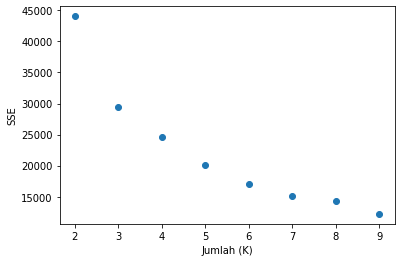

In [53]:
#21.periksa masing2 cluster 
cluster_number  =  range(2,10)
plt.scatter(cluster_number,errors) 
plt.xlabel('Jumlah (K)')
plt.ylabel('SSE') 
plt.show()

In [54]:
#22.Memilih k =3 untuk kmeans clustering
kmeans = KMeans(featuresCol='features',k=3,)

In [55]:
#23.latih data baru kmeans
model = kmeans.fit(final_data)

In [56]:
#24.Membuat prediksi
predictions=model.transform(final_data)

In [57]:
#25.periksa kolom prediksi 
predictions.columns

['Variance',
 'Skewness',
 'Curtosis',
 'Entropy',
 'Class',
 'features',
 'prediction']

In [58]:
#26.periksa hasil prediksi
predictions.groupBy('Variance','prediction').count().show()

+--------+----------+-----+
|Variance|prediction|count|
+--------+----------+-----+
|  0.4339|         1|    1|
|  1.1518|         2|    1|
|   2.565|         1|    1|
| -2.8267|         0|    1|
|-0.11716|         2|    1|
|-0.37013|         0|    1|
| -3.0201|         2|    1|
| -1.8343|         0|    1|
|-0.71494|         2|    1|
|  2.3164|         2|    1|
| 0.32924|         2|    1|
|  2.3925|         1|    1|
|-0.11996|         1|    1|
| -1.5252|         0|    1|
| 0.75108|         2|    1|
| -6.4247|         1|    1|
|  -3.793|         0|    1|
|  -5.637|         1|    1|
| -2.9498|         0|    1|
|  2.5605|         1|    1|
+--------+----------+-----+
only showing top 20 rows



In [59]:
#27.konveri ke pandas untuk membandingkan hasil
pandas_df = predictions.toPandas()
pandas_df.head(5)


,Variance,Skewness,Curtosis,Entropy,Class,features,prediction
0,3.62160,8.6661,-2.8073,-0.44699,0,"[3.6216, 8.6661, -2.8073, -0.44699]",1
1,4.54590,8.1674,-2.4586,-1.46210,0,"[4.5459, 8.1674, -2.4586, -1.4621]",1
2,3.86600,-2.6383,1.9242,0.10645,0,"[3.866, -2.6383, 1.9242, 0.10645]",2
3,3.45660,9.5228,-4.0112,-3.59440,0,"[3.4566, 9.5228, -4.0112, -3.5944]",1
4,0.32924,-4.4552,4.5718,-0.98880,0,"[0.32924, -4.4552, 4.5718, -0.9888]",2


Kesimpulan : Pada data tersebut kami melakukan data preparation terlebih dahulu untuk memastikan data layak atau tidak dengan memastikan tidak adanya data yang duplikat dan bernilai null, kemudian jika sudah bersih data tersebut kami gunakan pada tahap exploration dan statiscial thinking dengan menggunakan beberapa algoritma Machine Learning diantaranya : Logistic Regrission,
Decision Tree Classification, 
Gradient Boosting tree Classification, Random Forest, 
SVM model for Classification, 
MLP Classifier dan K-MEANS. tujuan dari memakai algoritma tersebut melakukan perbandingan akurasi dan error diantara algoritma tersebut.